In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter

import read_conditions as rc
import analyze_control as ac
import central_system as cs

import report_study_case

Importing Jupyter notebook from report_study_case.ipynb


# 気候条件

本モジュールでは、気候条件の取得と、作用温度（operative temperature）の取得について示します。

## 0. 検討ケースの取得

In [2]:
case = report_study_case.get_case()
hday, cday = report_study_case.get_display_day()

## 1. 気候条件の取得

### 温度

$ \theta_{ex} $: 温度, ℃

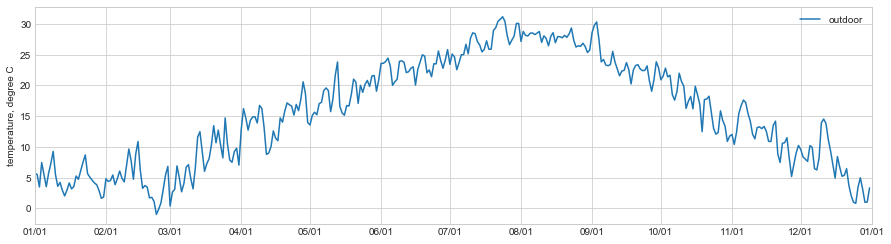

In [3]:
theta_ex = cs.get_outdoor_temperature(case['region'])
ac.draw_graph('temperature, degree C', [(theta_ex, 'outdoor')], 'ave')

### 絶対湿度

$ X_{ex} $:絶対湿度, kg/kg(DA)

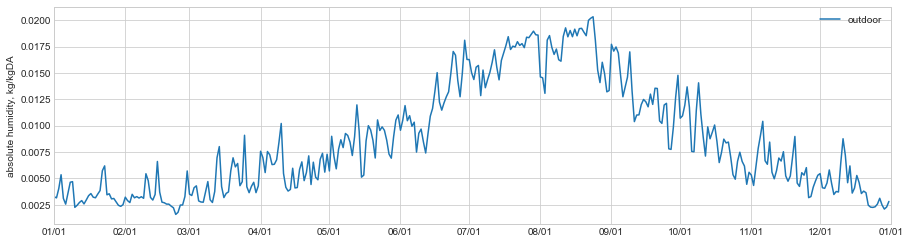

In [4]:
x_ex = cs.get_absolute_humidity(case['region'])
ac.draw_graph('absolute humidity, kg/kgDA', [(x_ex, 'outdoor')], 'ave')

### 相対湿度

$h_{ex}$:相対湿度, %

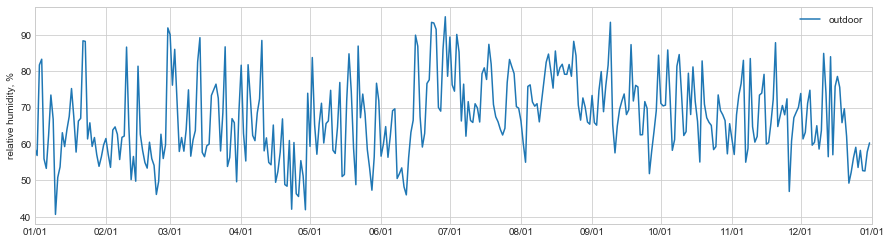

In [5]:
h_ex = cs.get_relative_humidity(theta_ex, x_ex)
ac.draw_graph('relative humidity, %', [(h_ex, 'outdoor')], 'ave')

### 水平面全天日射量

$j$:水平面全天日射量, W/m<sup>2</sup>

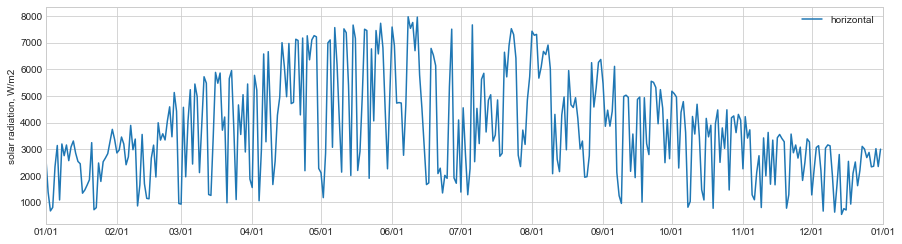

In [6]:
j = cs.get_horizontal_solar(case['region'])
ac.draw_graph('solar radiation, W/m2', [(j, 'horizontal')], 'itg')

## 2. SAT温度の計算

$$ \theta_{SAT,d,t} = \theta_{ex,d,t} + 0.034 J_{d,t} $$

$\theta_{SAT,d,t}$：日付$d$の時刻$t$における水平面における等価外気温度, ℃  
$\theta_{ex,d,t}$：日付$d$の時刻$t$における外気温度, ℃  
$J_{d,t}$：日付$d$の時刻$t$における水平面全天日射量, W/m<sup>2</sup>

日付 $d$ の時刻 $t$ における水平面全天日射量 $J_{d,t}$ は、第11章「その他」第2節「日射に関する地域区分と日射量」付録A「傾斜面における単位面積当たりの平均日射量」A.2「傾斜面における単位面積当たりの平均日射量の計算方法」において、傾斜面の方位角 $P_\alpha$ を 0°、傾斜面の傾斜角 $P_\beta$ を0°として計算した日付 $d$ 時刻 $t$ における傾斜面の単位面積当たりの平均日射量 $I_{s,d,t}$ である。その際、日付 $d$ の時刻 $t$ における法線面直達日射量 $I_{DN,d,t}$ ・水平面全天日射量 $I_{Sky,d,t}$ ・太陽高度 $h_{d,t}$ ・太陽方位角 $A_{d,t}$ は、第11章「その他」第1節「地域の区分と外気条件」において、地域の区分に応じて定める値とする。

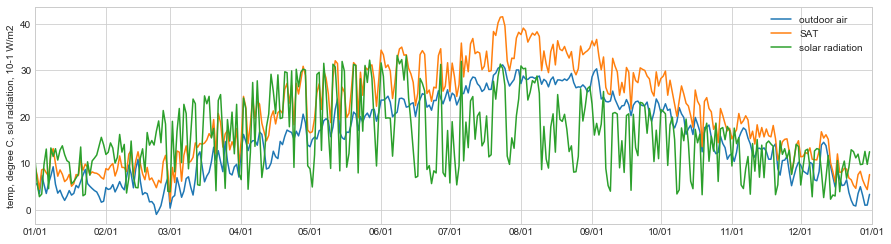

In [7]:
theta_sat = cs.get_sat_temperature(case['region'])
ac.draw_graph(
    y_title='temp, degree C, sol radiation, 10-1 W/m2',
    ys=[(theta_ex, 'outdoor air'), (theta_sat, 'SAT'), (j*10**(-1), 'solar radiation')], op='ave')

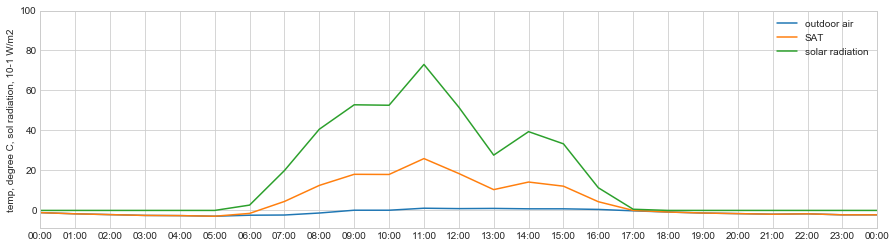

In [8]:
ac.draw_graph(y_title='temp, degree C, sol radiation, 10-1 W/m2',
              ys=[(theta_ex, 'outdoor air'), (theta_sat, 'SAT'), (j*10**(-1), 'solar radiation')],
              op='raw', display_date=hday)

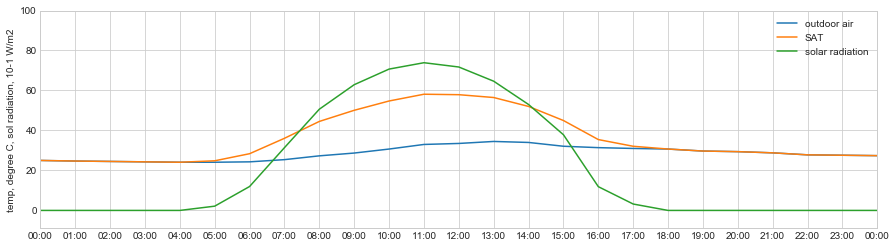

In [9]:
ac.draw_graph(y_title='temp, degree C, sol radiation, 10-1 W/m2',
              ys=[(theta_ex, 'outdoor air'), (theta_sat, 'SAT'), (j*10**(-1), 'solar radiation')],
              op='raw', display_date=cday)

## 3. 外部モジュールへの引き渡し

本モジュールを外部のモジュールから呼び出して必要な値を取得する場合に利用する関数を定義します。

In [10]:
def get_external_conditions(region):
    
    # outdoor temperature, degree C
    theta_ex = cs.get_outdoor_temperature(region)
    
    # outdoor absolute humidity, kg/kg(DA)
    x_ex = cs.get_absolute_humidity(region)
    
    # outdoor relative humidity, %
    h_ex = cs.get_relative_humidity(theta_ex, x_ex)
    
    # horizontal total solar radiation, W/m2
    j = cs.get_horizontal_solar(region)
    
    # SAT temperature, degree C
    theta_sat = cs.get_sat_temperature(region)
    
    return theta_ex, x_ex, h_ex, j, theta_sat

## 4. 各地域での比較

### 外気温度（最大・平均・最小）

In [11]:
ex_temp_region1 = (rc.read_temperature(1), 'region1')
ex_temp_region2 = (rc.read_temperature(2), 'region2')
ex_temp_region3 = (rc.read_temperature(3), 'region3')
ex_temp_region4 = (rc.read_temperature(4), 'region4')
ex_temp_region5 = (rc.read_temperature(5), 'region5')
ex_temp_region6 = (rc.read_temperature(6), 'region6')
ex_temp_region7 = (rc.read_temperature(7), 'region7')
ex_temp_region8 = (rc.read_temperature(8), 'region8')

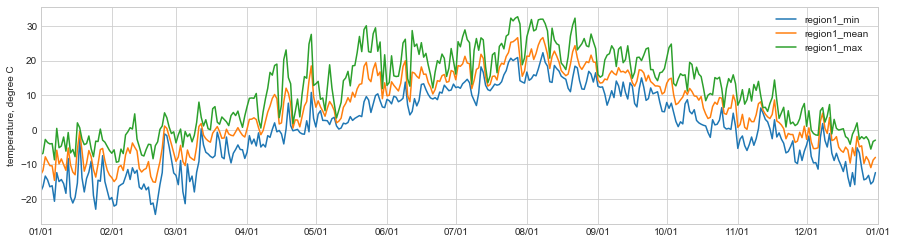

In [12]:
ac.draw_graph('temperature, degree C', [ex_temp_region1], op='a3')

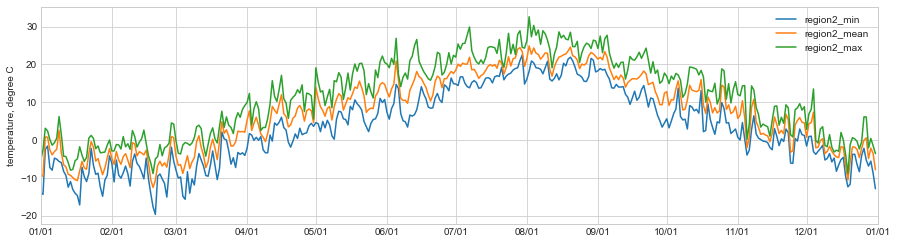

In [13]:
ac.draw_graph('temperature, degree C', [ex_temp_region2], op='a3')

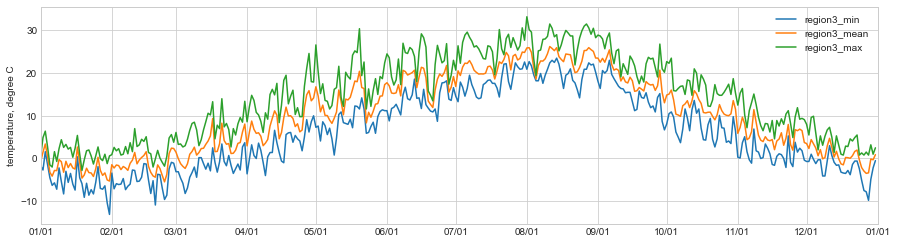

In [14]:
ac.draw_graph('temperature, degree C', [ex_temp_region3], op='a3')

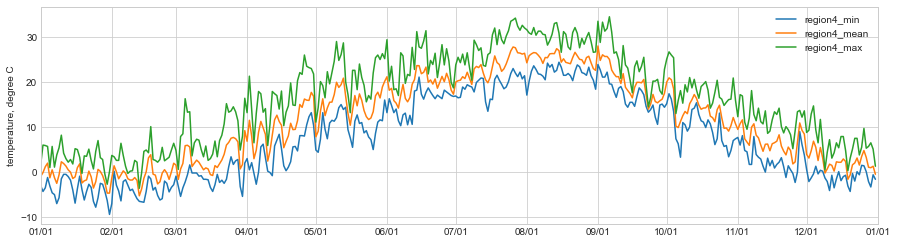

In [15]:
ac.draw_graph('temperature, degree C', [ex_temp_region4], op='a3')

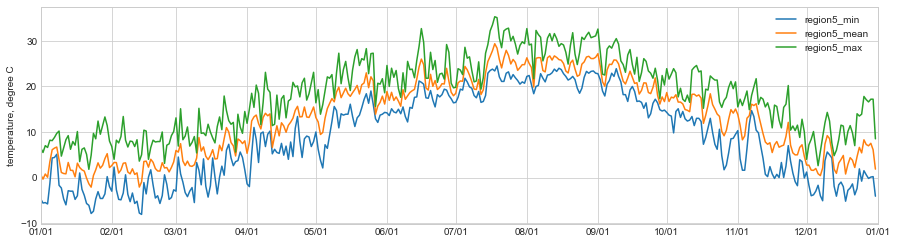

In [16]:
ac.draw_graph('temperature, degree C', [ex_temp_region5], op='a3')

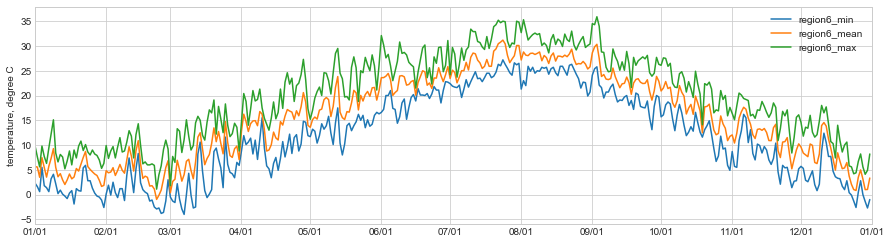

In [17]:
ac.draw_graph('temperature, degree C', [ex_temp_region6], op='a3')

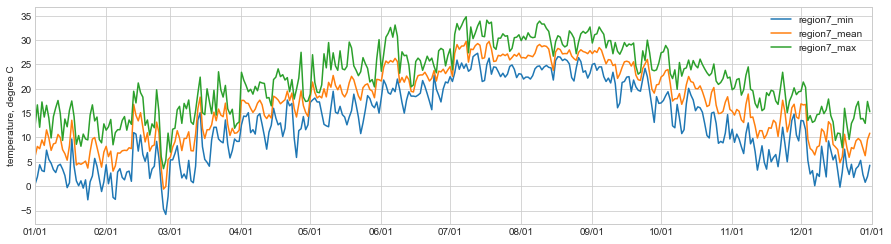

In [18]:
ac.draw_graph('temperature, degree C', [ex_temp_region7], op='a3')

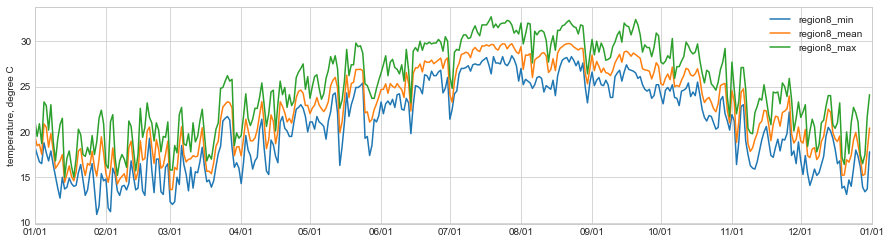

In [19]:
ac.draw_graph('temperature, degree C', [ex_temp_region8], op='a3')

### 外気温度（平均・各地域）

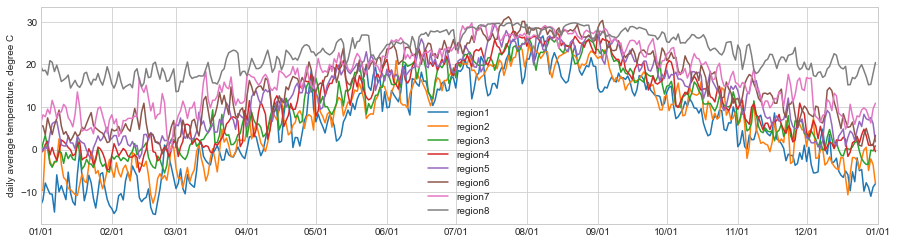

In [20]:
data = [
    ex_temp_region1,
    ex_temp_region2,
    ex_temp_region3,
    ex_temp_region4,
    ex_temp_region5,
    ex_temp_region6,
    ex_temp_region7,
    ex_temp_region8,
]
ac.draw_graph('daily average temperature, degree C',data, op='ave')

### 外気絶対湿度（最大・平均・最小）

In [21]:
ex_absolute_humidity_region1 = (rc.read_absolute_humidity(1), 'region1')
ex_absolute_humidity_region2 = (rc.read_absolute_humidity(2), 'region2')
ex_absolute_humidity_region3 = (rc.read_absolute_humidity(3), 'region3')
ex_absolute_humidity_region4 = (rc.read_absolute_humidity(4), 'region4')
ex_absolute_humidity_region5 = (rc.read_absolute_humidity(5), 'region5')
ex_absolute_humidity_region6 = (rc.read_absolute_humidity(6), 'region6')
ex_absolute_humidity_region7 = (rc.read_absolute_humidity(7), 'region7')
ex_absolute_humidity_region8 = (rc.read_absolute_humidity(8), 'region8')

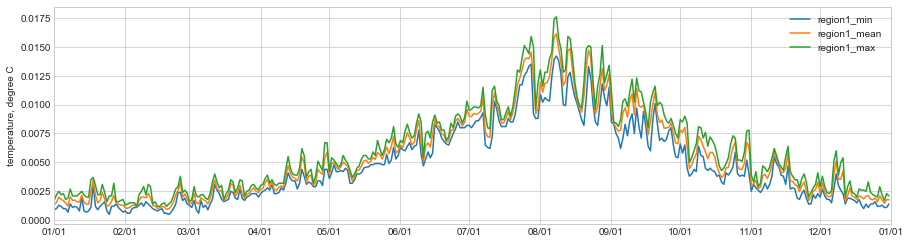

In [22]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region1], op='a3')

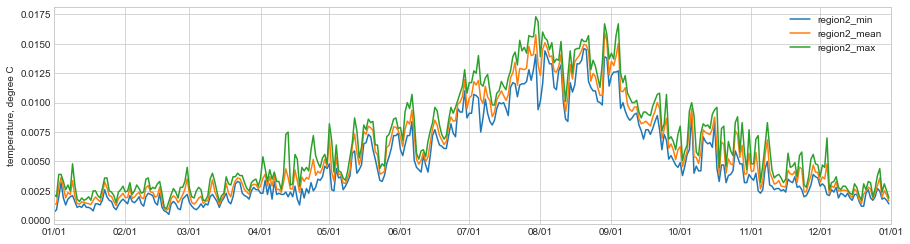

In [23]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region2], op='a3')

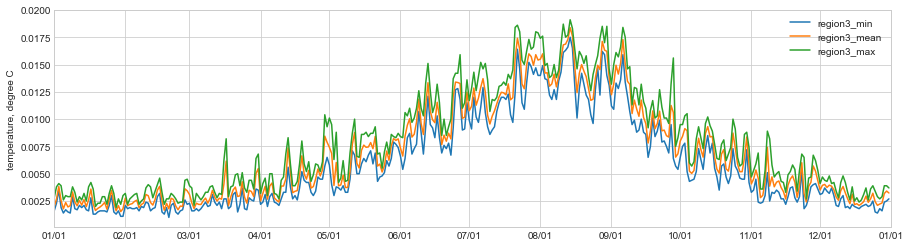

In [24]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region3], op='a3')

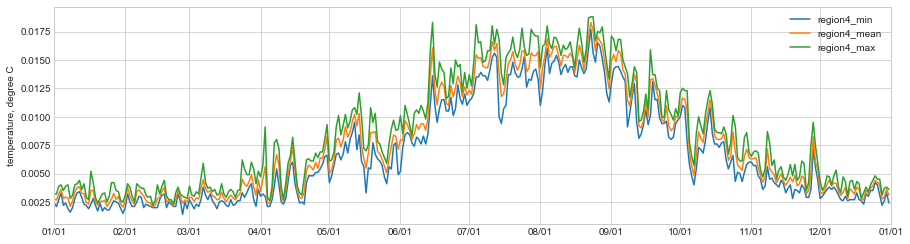

In [25]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region4], op='a3')

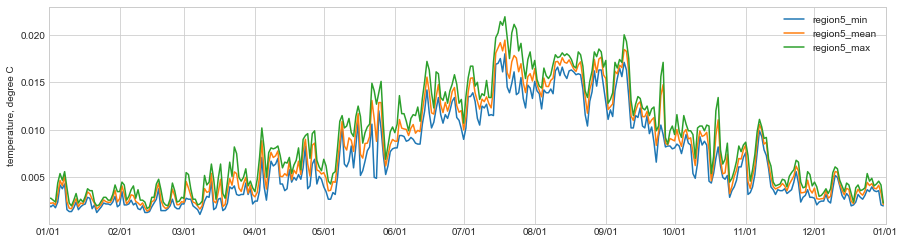

In [26]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region5], op='a3')

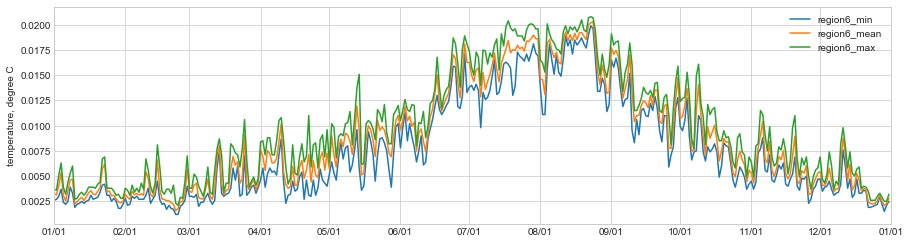

In [27]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region6], op='a3')

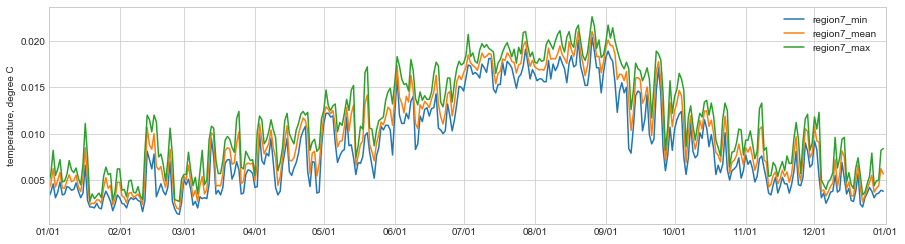

In [28]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region7], op='a3')

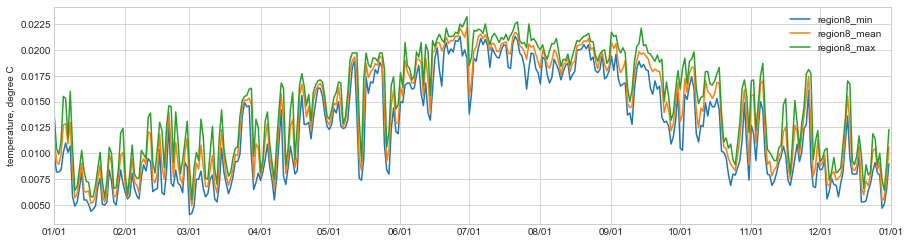

In [29]:
ac.draw_graph('temperature, degree C', [ex_absolute_humidity_region8], op='a3')

### 外気絶対湿度（平均・各地域）

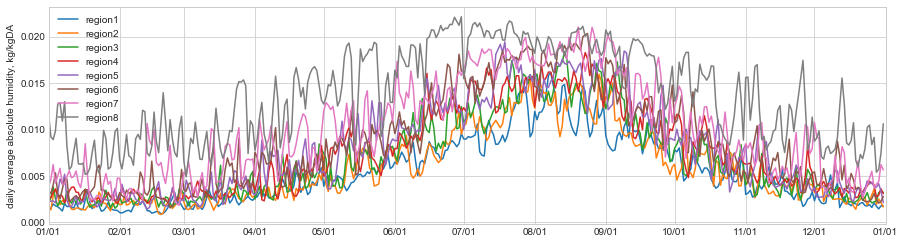

In [30]:
data = [
    ex_absolute_humidity_region1,
    ex_absolute_humidity_region2,
    ex_absolute_humidity_region3,
    ex_absolute_humidity_region4,
    ex_absolute_humidity_region5,
    ex_absolute_humidity_region6,
    ex_absolute_humidity_region7,
    ex_absolute_humidity_region8,
]
ac.draw_graph('daily average absolute humidity, kg/kgDA',data, op='ave')

### 外気相対湿度（最大・平均・最小）

In [31]:
ex_relative_humidity_region1 = (cs.get_relative_humidity(ex_temp_region1[0], ex_absolute_humidity_region1[0]), 'region1')
ex_relative_humidity_region2 = (cs.get_relative_humidity(ex_temp_region2[0], ex_absolute_humidity_region2[0]), 'region2')
ex_relative_humidity_region3 = (cs.get_relative_humidity(ex_temp_region3[0], ex_absolute_humidity_region3[0]), 'region3')
ex_relative_humidity_region4 = (cs.get_relative_humidity(ex_temp_region4[0], ex_absolute_humidity_region4[0]), 'region4')
ex_relative_humidity_region5 = (cs.get_relative_humidity(ex_temp_region5[0], ex_absolute_humidity_region5[0]), 'region5')
ex_relative_humidity_region6 = (cs.get_relative_humidity(ex_temp_region6[0], ex_absolute_humidity_region6[0]), 'region6')
ex_relative_humidity_region7 = (cs.get_relative_humidity(ex_temp_region7[0], ex_absolute_humidity_region7[0]), 'region7')
ex_relative_humidity_region8 = (cs.get_relative_humidity(ex_temp_region8[0], ex_absolute_humidity_region8[0]), 'region8')

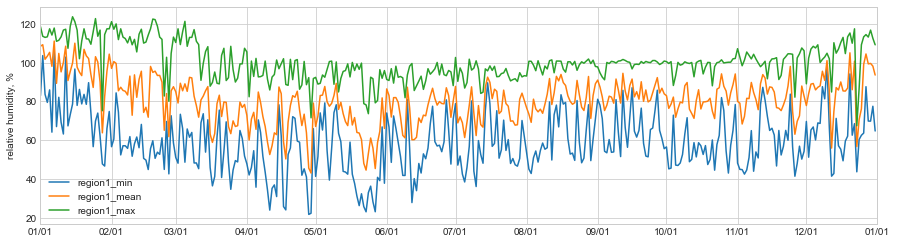

In [32]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region1], op='a3')

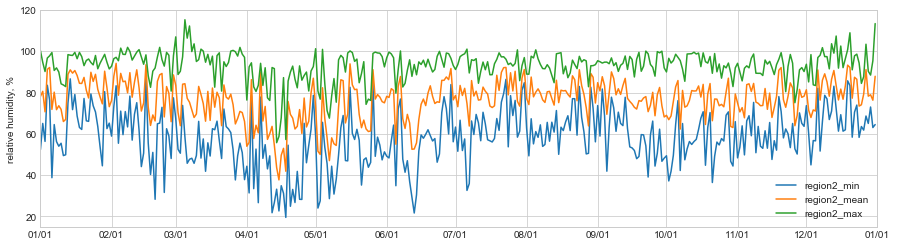

In [33]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region2], op='a3')

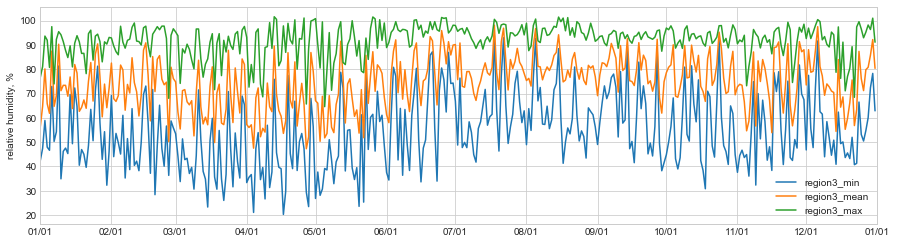

In [34]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region3], op='a3')

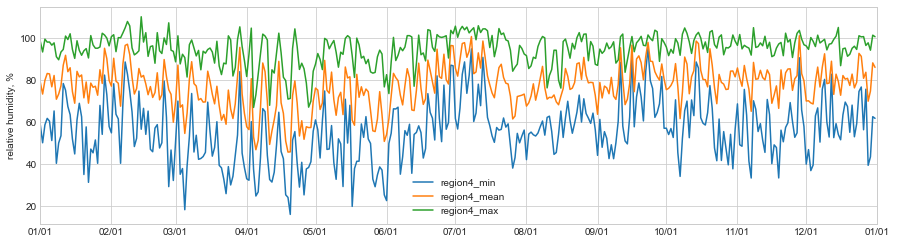

In [35]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region4], op='a3')

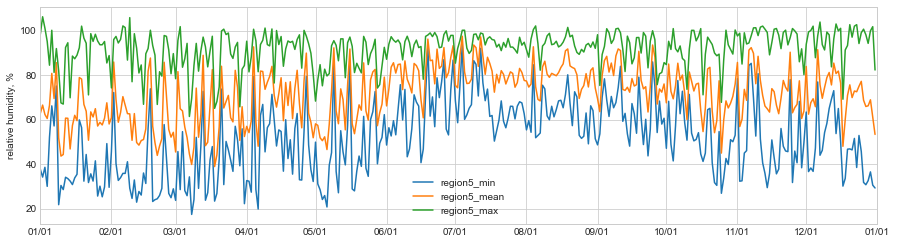

In [36]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region5], op='a3')

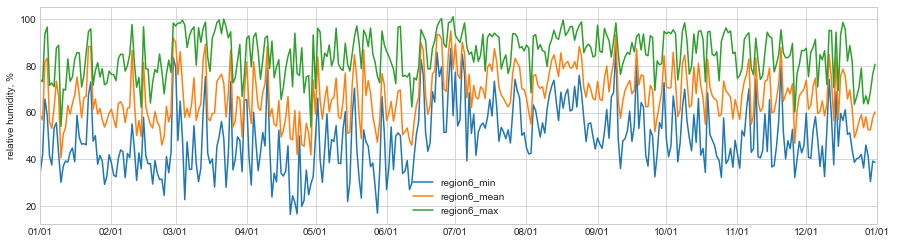

In [37]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region6], op='a3')

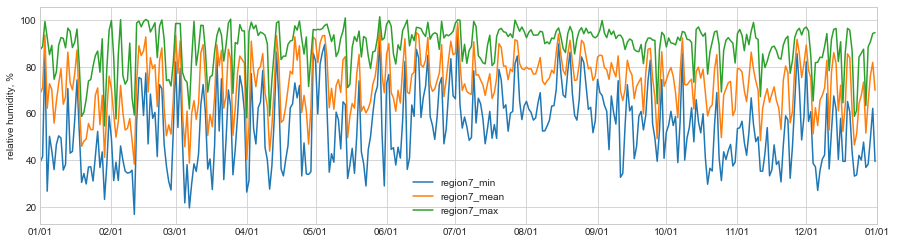

In [38]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region7], op='a3')

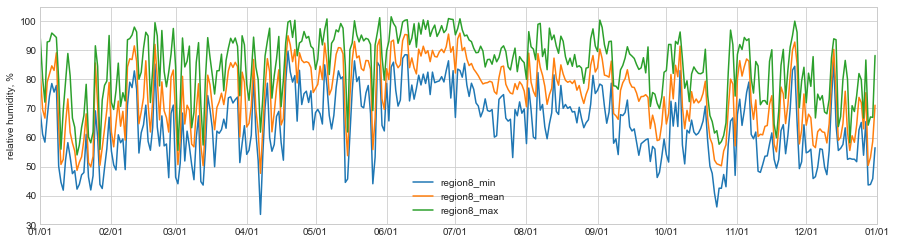

In [39]:
ac.draw_graph('relative humidity, %', [ex_relative_humidity_region8], op='a3')

### 外気絶対湿度（平均・各地域）

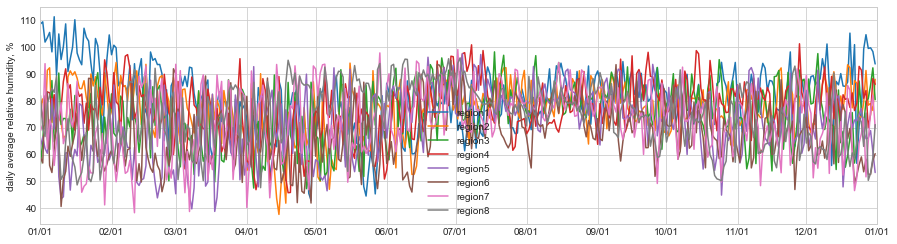

In [40]:
data = [
    ex_relative_humidity_region1,
    ex_relative_humidity_region2,
    ex_relative_humidity_region3,
    ex_relative_humidity_region4,
    ex_relative_humidity_region5,
    ex_relative_humidity_region6,
    ex_relative_humidity_region7,
    ex_relative_humidity_region8,
]
ac.draw_graph('daily average relative humidity, %',data, op='ave')

### 日射量

In [41]:
def draw_graph_solar(region):
    ac.draw_graph('daily integrated solar radiation, MJ/m2 d',[
        (rc.read_direct_solar(region)*3600*10**(-6), 'direct region'+str(region)),
        (rc.read_horizontal_sky_solar(region)*3600*10**(-6), 'sky region'+str(region)),
        (rc.read_night_radiation(region)*3600*10**(-6), 'night region'+str(region)),
        (rc.get_horizontal_solar(region)*3600*10**(-6), 'horizontal total region'+str(region))
    ], op='itg')

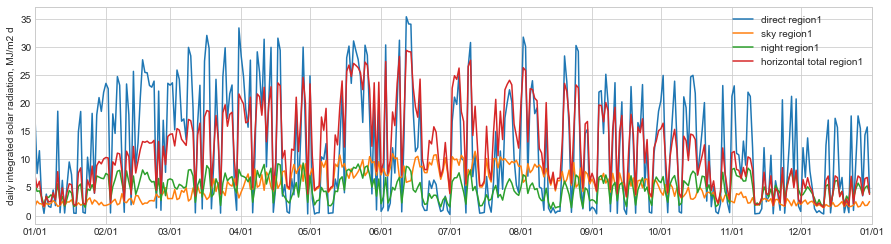

In [42]:
draw_graph_solar(1)

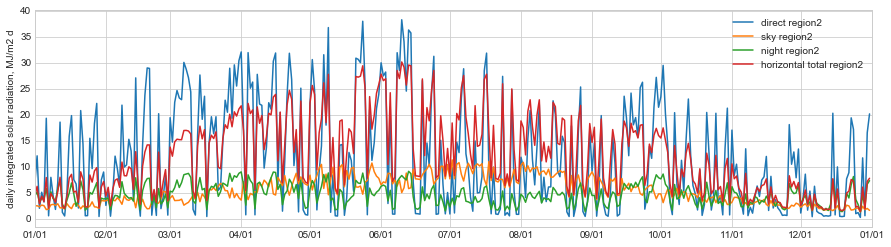

In [43]:
draw_graph_solar(2)

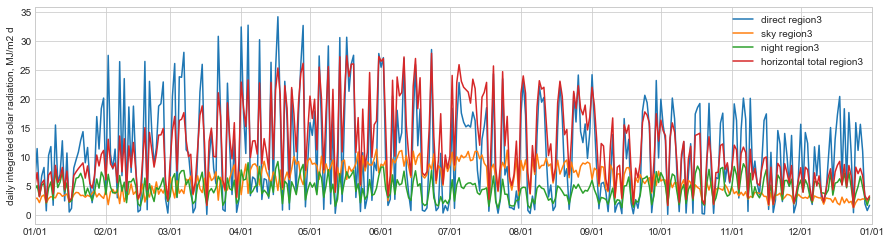

In [44]:
draw_graph_solar(3)

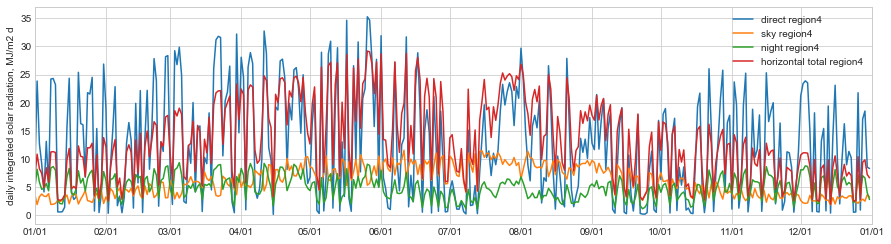

In [45]:
draw_graph_solar(4)

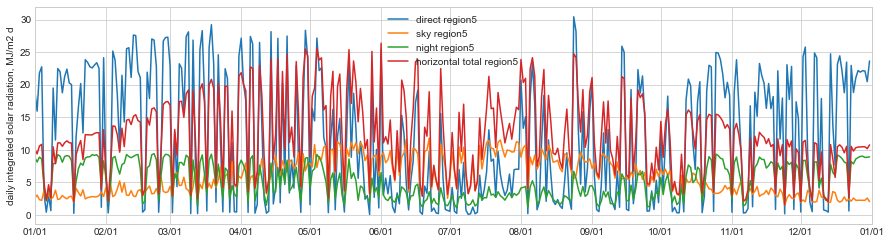

In [46]:
draw_graph_solar(5)

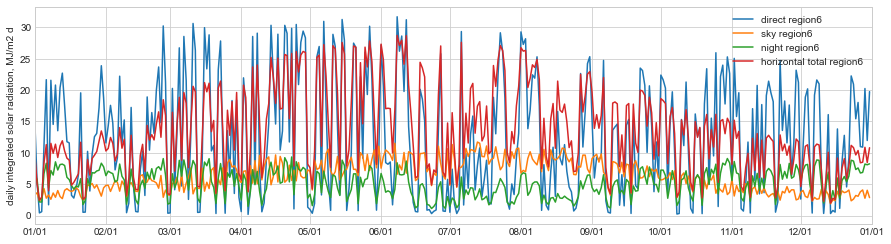

In [47]:
draw_graph_solar(6)

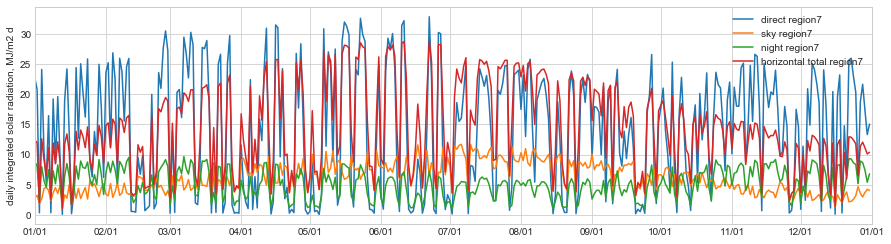

In [48]:
draw_graph_solar(7)

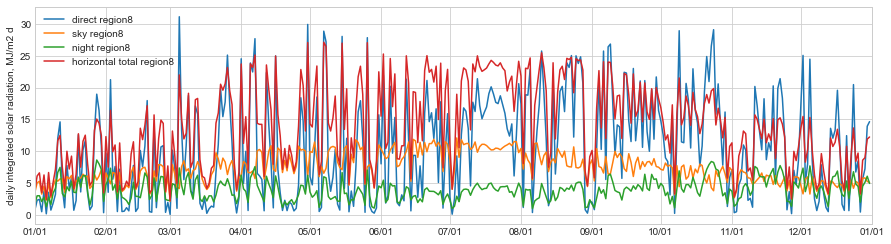

In [49]:
draw_graph_solar(8)

### 年間積算日射量

In [50]:
def draw_integrated_graph_solar():
    
    # regions
    regions = [1,2,3,4,5,6,7,8]
    regions_label = ['region 1', 'region 2', 'region 3', 'region 4', 'region 5', 'region 6', 'region 7', 'region 8']
    
    # number of bars
    n = 8
    
    # data
    ys_direct = []  # direct solar, MJ/m2 d
    ys_sky = []  # sky solar, MJ/m2 d
    ys_night = []  # night solar, MJ/m2 d
    ys_horizontal = []  # horizontal solar, MJ/m2 d
    
    for region in regions:
        ys_direct.append(np.sum(rc.read_direct_solar(region)*3600*10**(-6)))
        ys_sky.append(np.sum(rc.read_horizontal_sky_solar(region)*3600*10**(-6)))
        ys_night.append(np.sum(rc.read_night_radiation(region)*3600*10**(-6)))
        ys_horizontal.append(np.sum(rc.get_horizontal_solar(region)*3600*10**(-6)))
    
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(1,1,1)

    ax.bar(np.arange(n)-0.3, ys_direct, width=0.15, color='red', label='direct')
    ax.bar(np.arange(n)-0.1, ys_sky, width=0.15, color='green', label='sky')
    ax.bar(np.arange(n)+0.1, ys_horizontal, width=0.15, color='blue', label='night')
    ax.bar(np.arange(n)+0.3, ys_night, width=0.15, color='black', label='horizontal total')

    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(regions_label)
    ax.set_ylabel('annual integrated solar radiation, MJ/m2 a')
    plt.legend()
    plt.show()

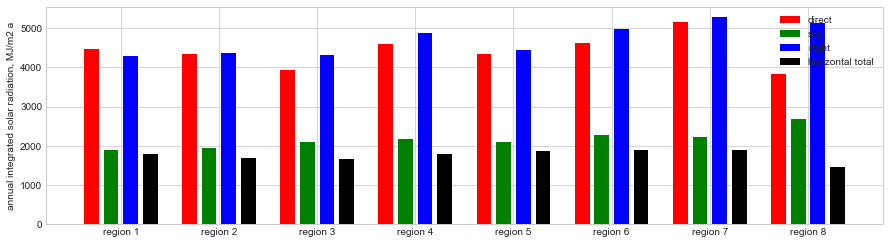

In [51]:
draw_integrated_graph_solar()